Define a python function, which given inputs X1,X2,Theta will return the probability of passing the class.

In [ ]:
import numpy as np

def f1(X1, X2):
    m = np.exp(6 + (-0.05 * X1) - X2)
    return 1/(1+m)

What will be the probability of passing the class for a student who studies for 40 hours and has a GPA of 3.5?

In [ ]:
import numpy as np

def f1(X1, X2):
    m = np.exp(6 + (-0.05 * X1) - X2)
    return 1/(1+m)

X1 = 40
X2 = 3.5

print(f1(X1,X2))

0.3775406687981454


How many hours would the aforementioned student need to study in order to have at least 50% chance of passing the class?

In [ ]:
# Q2 Part 3

def f2(X1, X2):
    m = np.exp(6 + (-0.05 * X1) - X2)
    return 1/(1+m)

X1 = 50
X2 = 3.5

print(f2(X1,X2))


0.5


#3. Logistic Regression (6pt)

In the data, the input features are five of Lag variables and Volume, and the binary output is Direction. Read the csv into a pandas dataframe and describe the relevant features and target variables of the dataset.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Weekly.csv',index_col = 0)

print(df.describe())
print(df['Lag1'].describe())
print('\n')
print(df['Lag2'].describe())
print('\n')
print(df['Lag3'].describe())
print('\n')
print(df['Lag4'].describe())
print('\n')
print(df['Lag5'].describe())
print('\n')
print(df['Volume'].describe())
print('\n')
print(df['Direction'].describe())

df.drop(columns='Today', inplace=True)


              Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
std       6.033182     2.357013     2.357254     2.360502     2.360279   
min    1990.000000   -18.195000   -18.195000   -18.195000   -18.195000   
25%    1995.000000    -1.154000    -1.154000    -1.158000    -1.158000   
50%    2000.000000     0.241000     0.241000     0.241000     0.238000   
75%    2005.000000     1.405000     1.409000     1.409000     1.409000   
max    2010.000000    12.026000    12.026000    12.026000    12.026000   

              Lag5       Volume        Today  
count  1089.000000  1089.000000  1089.000000  
mean      0.139893     1.574618     0.149899  
std       2.361285     1.686636     2.356927  
min     -18.195000     0.087465   -18.195000  
25%      -1.166000     0.332022    -1.154000  
50%       0.234000     1.002680     0.241000  
75% 

In [ ]:
df['Year'] = df['Year'].astype(float)
df.loc[df['Direction']=='Down', 'Direction'] = 1
df.loc[df['Direction']=='Up', 'Direction'] = 0
df['Direction'] = df['Direction'].astype(float)

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Direction', axis = 1)
Y = df['Direction']
X.shape,Y.shape
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)
print(X_train.shape)

#df2['Direction'].replace(['Up','Down'],
                            #[0,1], inplace=True)

(871, 7)


We plan to reuse the SGD procedure from Assignment 2 to fit a logistic regression model. Do we need to write a new gradient function tailored to binary logistic regression, or can we use the one written in Assignment 2?

Ans: We cannot reuse the SGD procedure from Assignment 2 as we had used SGD for linear regression in so we need to write a new gradient function tailored to binary logistic regression. and we use the code from Assignment 2 however we change it a little bit and add SGDClassifier(loss='log') for Logistic Regression. 

Extend the gradient function such that a regularized logistic loss is being minimized. In particular, consider an 
 penalty on the parameters (except the intercept). For this, the gradient function will need: (a) a penalty input that can take two values: "none" and "l2", and (b) an optional regularization coefficient  input. Summarize the changes from the previously written gradient function that were necessary to accomplish this.

In [ ]:
import numpy as np
import scipy
from scipy.special import expit

class LogisticRegression(object):
    """
    Logistic Regression Classifier
    Parameters
    ----------
    learning_rate : int or float, default=0.1
        The tuning parameter for the optimization algorithm (here, Gradient Descent) 
        that determines the step size at each iteration while moving toward a minimum 
        of the cost function.
    max_iter : int, default=100
        Maximum number of iterations taken for the optimization algorithm to converge
    
    penalty : None or 'l2', default='l2'.
        Option to perform L2 regularization.
    C : float, default=0.1
        Inverse of regularization strength; must be a positive float. 
        Smaller values specify stronger regularization. 
    tolerance : float, optional, default=1e-4
        Value indicating the weight change between epochs in which
        gradient descent should terminated. 
    """

    def __init__(self, learning_rate=0.1, max_iter=100, regularization='l2', C = 0, tolerance = 1e-4):
        self.learning_rate  = learning_rate
        self.max_iter       = max_iter
        self.regularization = regularization
        self.C              = C
        self.tolerance      = tolerance
    
    def fit(self, X, y):
        """
        Fit the model according to the given training data.
        Parameters
        ----------
        X : {array-like, sparse matrix} of shape (n_samples, n_features)
            Training vector, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like of shape (n_samples,)
            Target vector relative to X.
        Returns
        -------
        self : object
        """
        self.theta = np.zeros(X.shape[1] + 1)
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

        for _ in range(self.max_iter):
            y_hat = self.__sigmoid(X @ self.theta)
            errors = y - y_hat
            N = X.shape[1]

            if self.regularization is not None:
                delta_grad = self.learning_rate * ((self.C * (X.T @ errors)) + np.sum(self.theta))
            else:
                delta_grad = self.learning_rate * (X.T @ errors)

            if np.all(abs(delta_grad) >= self.tolerance):
                self.theta -= delta_grad / N
            else:
                break
                
        return self

    def predict_proba(self, X):
        """
        Probability estimates for samples in X.
        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Vector to be scored, where `n_samples` is the number of samples and
            `n_features` is the number of features.
        Returns
        -------
        probs : array-like of shape (n_samples,)
            Returns the probability of each sample.
        """
        return self.__sigmoid((X @ self.theta[1:]) + self.theta[0])
    
    def predict(self, X):
        """
        Predict class labels for samples in X.
        Parameters
        ----------
        X : array_like or sparse matrix, shape (n_samples, n_features)
            Samples.
        Returns
        -------
        labels : array, shape [n_samples]
            Predicted class label per sample.
        """
        return np.round(self.predict_proba(X))
        
    def __sigmoid(self, z):
        """
        The sigmoid function.
        Parameters
        ------------
        z : float
            linear combinations of weights and sample features
            z = w_0 + w_1*x_1 + ... + w_n*x_n
        Returns
        ---------
        Value of logistic function at z
        """
        return 1 / (1 + expit(-z))

    def get_params(self):
        """
        Get method for models coeffients and intercept.
        Returns
        -------
        params : dict
        """
        try:
            params = dict()
            params['intercept'] = self.theta[0]
            params['coef'] = self.theta[1:]
            return params
        except:
            raise Exception('Fit the model first!')


clf = LogisticRegression()
clf.fit(X_test.values, Y_test.values)
y_pred = clf.predict(X_test.values)
print(y_pred)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


Write a python function that takes the predicted labels and the true label arrays, and computes the confusion matrix.

In [ ]:
X = df.drop('Direction', axis = 1)
Y = df['Direction']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)
from sklearn.linear_model import LogisticRegression
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
clf = LogisticRegression(random_state=10).fit(X_train,Y_train)
y_predicted = clf.predict(X_train[:218])

def confusionmatrix(y_true,y_pred):
  labels = unique_labels(Y)
  column = [f'predicted{label}' for label in labels]
  index =  [f'actual{label}' for label in labels]
  table = pd.DataFrame(confusion_matrix(y_true,y_pred),columns = column, index = index)
  return table

confusionmatrix(Y[:218],y_predicted)

,predicted0.0,predicted1.0
actual0.0,117,5
actual1.0,91,5


Use the above function to report the confusion matrix and the accuracy on both training and test data for two models

A.the learned model when the regularization is absent

In [ ]:
import numpy as np
import scipy
from scipy.special import expit

class LogisticRegression(object):
    def __init__(self, learning_rate=0.05, epoch=100, regularization=None, C = None, tolerance = 1e-9):
        self.learning_rate  = learning_rate
        self.max_iter       = epoch
        self.regularization = regularization
        self.C              = C
        self.tolerance      = tolerance
    
    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1] + 1)
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

        for _ in range(self.max_iter):
            y_hat = self.__sigmoid(X @ self.theta)
            errors = y - y_hat
            N = X.shape[1]

            if self.regularization is not None:
                delta_grad = self.learning_rate * ((self.C * (X.T @ errors)) + np.sum(self.theta))
            else:
                delta_grad = self.learning_rate * (X.T @ errors)

            if np.all(abs(delta_grad) >= self.tolerance):
                self.theta -= delta_grad / N
            else:
                break
                
        return self

    def predict_proba(self, X):
        return self.__sigmoid((X @ self.theta[1:]) + self.theta[0])
    
    def predict(self, X):
        return np.round(self.predict_proba(X))
        
    def __sigmoid(self, z):
        return 1 / (1 + expit(-z))

    def get_params(self):
        try:
            params = dict()
            params['intercept'] = self.theta[0]
            params['coef'] = self.theta[1:]
            return params
        except:
            raise Exception('Fit the model first!')


clf = LogisticRegression()
clf.fit(X_test.values, Y_test.values)
clf.fit(X_train.values, Y_train.values)
y_pred_test_no_regularization = clf.predict(X_test.values)
y_pred_train_no_regularization = clf.predict(X_train.values)
print('Predicted values for test dataset')
print(y_pred_test_no_regularization)
print('Confusion Matrix for test data')
print(confusionmatrix(Y_test,y_pred_test_no_regularization))
print('Accuracy:', metrics.accuracy_score(Y_test,y_pred_test_no_regularization)*100,'%')
print('\n')



Predicted values for test dataset
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
Confusion Matrix for test data
           predicted0.0  predicted1.0
actual0.0             0           113
actual1.0             0           105
Accuracy: 48.1651376146789 %




In [ ]:
print('Predicted values for training dataset')
print(y_pred_train_no_regularization)
print('Confusion Matrix for training data')
print(confusionmatrix(Y_train, y_pred_train_no_regularization))
print('Accuracy:', metrics.accuracy_score(Y_train,y_pred_train_no_regularization)*100,'%')

Predicted values for training dataset
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 

B.the learned model when regularization is present. (Hint: As nothing is specified, your default threshold to decide Up/Down can be 0.5.)

In [ ]:
import numpy as np
import scipy
from scipy.special import expit

class LogisticRegression(object):

    def __init__(self, learning_rate=0.8, epoch=200, regularization='l2', C = 0.5, tolerance = 0e-5):
        self.learning_rate  = learning_rate
        self.max_iter       = epoch
        self.regularization = regularization
        self.C              = C
        self.tolerance      = tolerance
    
    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1] + 1)
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

        for _ in range(self.max_iter):
            y_hat = self.__sigmoid(X @ self.theta)
            errors = y - y_hat
            N = X.shape[1]
            cost_append = []
            if self.regularization is not None:
                delta_grad = self.learning_rate * ((self.C * (X.T @ errors)) + np.sum(self.theta))
                cost_append.append(delta_grad)
            else:
                delta_grad = self.learning_rate * (X.T @ errors)
                cost_append.append(delta_grad)

            if np.all(abs(delta_grad) >= self.tolerance):
                self.theta -= delta_grad / N
            else:
                break
                
        return self, cost_append

    def predict_proba(self, X):
        return self.__sigmoid((X @ self.theta[1:]) + self.theta[0])
    
    def predict(self, X):
        return np.round(self.predict_proba(X))
        
    def __sigmoid(self, z):
        return 1 / (1 + expit(-z))

    def get_params(self):
        try:
            params = dict()
            params['intercept'] = self.theta[0]
            params['coef'] = self.theta[1:]
            return params
        except:
            raise Exception('Fit the model first!')

clf = LogisticRegression()
clf.fit(X_test.values, Y_test.values)
variable,cost = clf.fit(X_test.values, Y_test.values)
clf.fit(X_train.values, Y_train.values)
y_pred_test = clf.predict(X_test.values)
y_pred_train = clf.predict(X_train.values)
print('Predicted values for test dataset')
print(y_pred_test)
print('Confusion Matrix for test data')
print(confusion_matrix1(Y_test,y_pred_test))
print('Accuracy:',metrics.accuracy_score(Y_test,y_pred_test)*100,'%')
print('\n')

Predicted values for test dataset
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
Confusion Matrix for test data
           predicted0.0  predicted1.0
actual0.0             0           113
actual1.0             0           105
Accuracy: 48.1651376146789 %




In [ ]:
print('Predicted values for training dataset')
print(y_pred_train)
print('Confusion Matrix for training data')
print(confusionmatrix(Y_train, y_pred_train))
print('Accuracy:', metrics.accuracy_score(Y_train,y_pred_train)*100,'%')

Predicted values for training dataset
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 

Is the model without the regularization overfitting?

No the model without regularization is not overfitting

Is the model with regularization underfitting? 

Yes the model with regularizartion is underfitting

Compare the performance of these two models with a corresponding model fit using scikit-learn.

In [ ]:
#Accuracy for test data with penalty = 'l2'
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#clf = LogisticRegression(random_state=0).fit(a_reshape,b)
clf = LogisticRegression(penalty = 'l2',C = 0.1, tol = 0.5,random_state=10).fit(X_test,Y_test)
y_predicted = clf.predict(X_test)
print(y_predicted)
print('confusion matrix for test data')
print(confusionmatrix(Y_test,y_predicted))
print('Accuracy of scikit for test data:', metrics.accuracy_score(Y_test,y_predicted)*100,'%')
print('Accuracy of SGD classifier:', metrics.accuracy_score(Y_test,y_pred_test)*100,'%')

[0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 1. 0.]
confusion matrix for test data
           predicted0.0  predicted1.0
actual0.0            74            39
actual1.0            53            52
Accuracy of scikit for test data: 57.798165137614674 %
Accuracy of SGD classifier: 48.1651376146789 %


In [ ]:
#Accuracy for training data with penalty = 'l2'
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#clf = LogisticRegression(random_state=0).fit(a_reshape,b)
clf = LogisticRegression(penalty = 'l2',C = 0.1, tol = 0.5,random_state=10).fit(X_train,Y_train)
y_predicted_train = clf.predict(X_train)
print(y_predicted_train)
print('confusion matrix for training data')
print(confusionmatrix(Y_train,y_predicted_train))
print('Accuracy of scikit for training data:', metrics.accuracy_score(Y_train,y_predicted_train)*100,'%')
print('Accuracy of SGD classifier:', metrics.accuracy_score(Y_train,y_pred_train)*100,'%')

[1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.

In [ ]:
#Accuracy for test data for penalty = 'None'
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#clf = LogisticRegression(random_state=0).fit(a_reshape,b)
clf = LogisticRegression(penalty = 'none',random_state=10).fit(X_test,Y_test)
y_predicted = clf.predict(X_test)
print(y_predicted)
print('confusion matrix for testing data')
print(confusionmatrix(Y_test,y_predicted))
print('Accuracy of scikit for test data:', metrics.accuracy_score(Y_test,y_predicted)*100,'%')
print('Accuracy of SGD:', metrics.accuracy_score(Y_test,y_pred_test_no_regularization)*100,'%')

[0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 1. 0.]
confusion matrix for testing data
           predicted0.0  predicted1.0
actual0.0            73            40
actual1.0            53            52
Accuracy of scikit for test data: 57.3394495412844 %
Accuracy of SGD: 48.1651376146789 %


In [ ]:
#Accuracy for train data for penalty = 'None'
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#clf = LogisticRegression(random_state=0).fit(a_reshape,b)
clf = LogisticRegression(penalty = 'none',random_state=10).fit(X_train,Y_train)
y_predicted_no_reg = clf.predict(X_train)
print(y_predicted_no_reg)
print('confusion matrix for testing data')
print(confusionmatrix(Y[:871],y_predicted_no_reg))
print('Accuracy of scikit for test data:', metrics.accuracy_score(Y_train,y_predicted_no_reg)*100,'%')
print('Accuracy of SGD:', metrics.accuracy_score(Y_train,y_pred_train_no_regularization)*100,'%')

[1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.

How do the various parameters (learning rate, regularization coefficient) influence our results?

As we increase the learning rate and regularisation we don't notice a considerable difference in the accuracy of the model

Implement a python function that takes the predicted labels and the true label arrays, and computes the F-score.

In [ ]:
def f_score(True_positive, True_negative, False_negative, False_positive):
  recall = True_positive/(True_positive + False_negative)
  precision = True_positive/(True_positive + False_positive)
  f1_score = (precision * recall / (precision + recall)) * 2
  return f1_score

f_score(111,11,74,22)

0.6981132075471698

Now you will run logistic regression (without regularization, and using our SGD procedure) five times with only one input features Lagj () for each time. Compute the confusion matrix, F score (using our implementations) and the accuracy on both training and test data given each of the learned models.

In [ ]:
X1 = df['Lag1']
X2 = df['Lag2']
X3 = df['Lag3']
X4 = df['Lag4']
X5 = df['Lag5']
Y1 = df['Direction']
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1,Y1,test_size=0.2)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2,Y1,test_size=0.2)
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X3,Y1,test_size=0.2)
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(X4,Y1,test_size=0.2)
X_train5, X_test5, Y_train5, Y_test5 = train_test_split(X5,Y1,test_size=0.2)

X_train1 = np.array(X_train1)
Y_train1 = np.array(Y_train1)
X_test1 =  np.array(X_test1)
Y_test1 = np.array(Y_test1)


In [ ]:
clf = LogisticRegression()
clf.fit(X_test.values, Y_test.values)
clf.fit(X_train.values, Y_train.values)
y_pred_test_no_regularization = clf.predict(X_test.values)
y_pred_train_no_regularization = clf.predict(X_train.values)
print('Predicted values for test dataset')
print(y_pred_test_no_regularization)
print('Confusion Matrix for test data')
print(confusionmatrix(Y_test,y_pred_test_no_regularization))
print('Accuracy:', metrics.accuracy_score(Y_test,y_pred_test_no_regularization)*100,'%')
print('\n')

Predicted values for test dataset
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0.]
Confusion Matrix for test data
           predicted0.0  predicted1.0
actual0.0           108             5
actual1.0            99             6
Accuracy: 52.293577981651374 %




#4. ROC Curves

Write a python function that takes the predicted labels and the true label arrays, and computes the ROC curve as well as the area under the ROC curve/Area Under Curve(AUC).

In [ ]:
def ROCandAUCcurve(y_test,y_pred,y_predicted, y_pred_test_no_regularization):
  from sklearn.metrics import roc_curve, roc_auc_score
  import matplotlib.pyplot as plt
  r_fpr,r_tpr, _ = roc_curve(y_test,  y_pred_test)
  rf_fpr, rf_tpr, _1 = roc_curve(y_test, y_predicted)
  nb_fpr, nb_tpr, _2 = roc_curve(y_test, y_pred_test_no_regularization)
  r_auc = roc_auc_score(y_test, y_pred_test)
  r_auc1 = roc_auc_score(y_test, y_pred_test_no_regularization)
  r_auc2 = roc_auc_score(y_test, y_predicted)
  plt.figure()
  plt.plot(r_fpr, r_tpr, linestyle='--', label='Model with regularization(AUROC = %0.3f)' % r_auc)
  plt.plot(rf_fpr, rf_tpr, marker='.', label='Scikit Model (AUROC = %0.3f)' % r_auc2)
  plt.plot(nb_fpr, nb_tpr, marker='.', label='Model with no regularization(AUROC = %0.3f)' % r_auc1)
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")
  plt.legend()
  plt.show()
  

Use the above function and matplotlib to draw ROC curves for the models from Question 3 with varying thresholds. Determine the best model in terms of the AUC. (Note: all ROC curves must be plotted in a single plot).

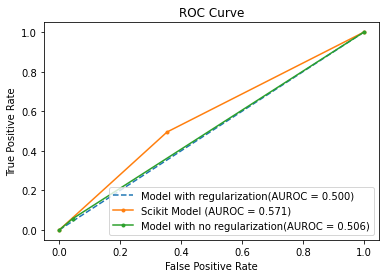

In [ ]:
#ROC Curve for test data
ROCandAUCcurve(Y_test,y_pred_test,y_predicted,y_pred_test_no_regularization)

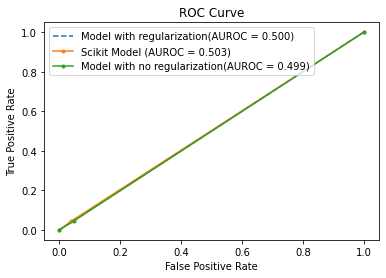

In [ ]:
#ROC Curve for training data
ROCandAUCcurve(Y_train[:218],y_pred_train[:218],y_predicted_train[:218],y_pred_train_no_regularization[:218])

Repeat step 2 with the reference implementation from scikit-learn.

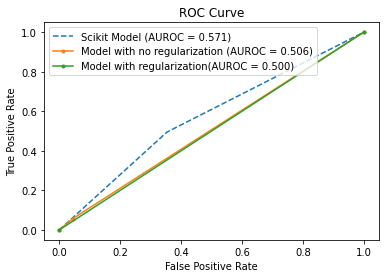

In [ ]:
#Accuracy for test data
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(Y_test,y_predicted)
fpr1,tpr1,thresholds1 = metrics.roc_curve(Y_test,y_pred_test_no_regularization)
fpr2,tpr2,thresholds2 = metrics.roc_curve(Y_test,y_pred_test)

auc = roc_auc_score(Y_test, y_predicted)
auc1 = roc_auc_score(Y_test, y_pred_test_no_regularization)
auc2 = roc_auc_score(Y_test, y_pred_test)

plt.plot(fpr, tpr, linestyle='--', label='Scikit Model (AUROC = %0.3f)' % auc)
plt.plot(fpr1, tpr1, marker='.', label='Model with no regularization (AUROC = %0.3f)' % auc1)
plt.plot(fpr2, tpr2, marker='.', label='Model with regularization(AUROC = %0.3f)' % auc2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

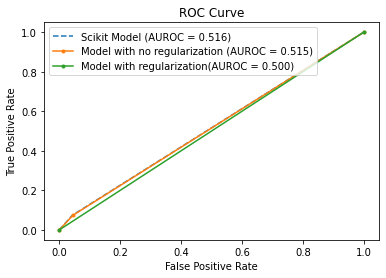

In [ ]:
#Accuracy for training data
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(Y_train,y_predicted_train)
fpr1,tpr1,thresholds1 = metrics.roc_curve(Y_train,y_pred_train_no_regularization)
fpr2,tpr2,thresholds2 = metrics.roc_curve(Y_train,y_pred_train)

auc = roc_auc_score(Y_train, y_predicted_train)
auc1 = roc_auc_score(Y_train, y_pred_train_no_regularization)
auc2 = roc_auc_score(Y_train, y_pred_train)

plt.plot(fpr, tpr, linestyle='--', label='Scikit Model (AUROC = %0.3f)' % auc)
plt.plot(fpr1, tpr1, marker='.', label='Model with no regularization (AUROC = %0.3f)' % auc1)
plt.plot(fpr2, tpr2, marker='.', label='Model with regularization(AUROC = %0.3f)' % auc2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Fit suitable k-nn and decision tree models (using your implementations from Assignment 1) to the Weekly dataset in Question 2, and compare them with the best logistic regression model obtained in part 2. Report the confusion matrices, accuracies, AUCs and the ROC curves (on the same plot) and comment on which model is the better one among the three types.

In [ ]:
#resource = https://github.com/python-engineer/MLfromscratch/blob/master/mlfromscratch/decision_tree.py

from collections import Counter

import numpy as np

def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])


class Node:
    def __init__(
        self, feature=None, threshold=None, left=None, right=None, *, value=None
    ):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # stopping criteria
        if (
            depth >= self.max_depth
            or n_labels == 1
            or n_samples < self.min_samples_split
        ):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        # greedily select the best split according to information gain
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)

        # grow the children that result from the split
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        # parent loss
        parent_entropy = entropy(y)

        # generate split
        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # compute the weighted avg. of the loss for the children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        # information gain is difference in loss before vs. after split
        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common


if __name__ == "__main__":
    # Imports
    from sklearn import datasets
    from sklearn.model_selection import train_test_split

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy



In [ ]:
#resource = https://github.com/python-engineer/MLfromscratch/blob/master/mlfromscratch/decision_tree.py

from collections import Counter

import numpy as np

def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])


class Node:
    def __init__(
        self, feature=None, threshold=None, left=None, right=None, *, value=None
    ):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # stopping criteria
        if (
            depth >= self.max_depth
            or n_labels == 1
            or n_samples < self.min_samples_split
        ):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        # greedily select the best split according to information gain
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)

        # grow the children that result from the split
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        # parent loss
        parent_entropy = entropy(y)

        # generate split
        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # compute the weighted avg. of the loss for the children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        # information gain is difference in loss before vs. after split
        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common


if __name__ == "__main__":
    # Imports
    from sklearn import datasets
    from sklearn.model_selection import train_test_split

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy